In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 182E-1B2C

 Directory of C:\Users\hp

25/05/2020  06:17 PM    <DIR>          .
25/05/2020  06:17 PM    <DIR>          ..
10/11/2019  10:15 PM    <DIR>          .anaconda
22/10/2019  08:46 AM    <DIR>          .astropy
02/02/2020  04:40 AM             1,384 .bash_history
10/11/2019  11:15 PM    <DIR>          .conda
10/11/2019  11:15 PM                43 .condarc
25/02/2020  04:49 PM               191 .gitconfig
28/01/2020  11:51 AM    <DIR>          .ipynb_checkpoints
24/09/2019  10:30 AM    <DIR>          .ipython
25/09/2019  08:40 AM    <DIR>          .jupyter
16/10/2019  09:38 AM    <DIR>          .matplotlib
02/02/2020  04:28 AM    <DIR>          .ssh
02/02/2020  04:40 AM             1,272 .viminfo
15/03/2020  12:44 PM    <DIR>          3D Objects
24/09/2019  10:28 AM    <DIR>          Anaconda3
30/10/2019  01:06 AM         4,679,408 assignment.ipynb
22/10/2019  08:29 AM            41,967 boston-data.csv
30/10/2019  10:10 PM   

In [5]:
data=pd.read_csv("Pacific_test.csv")

In [6]:
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP101985,JIMENA,19850721,600,,TD,12.8N,107.7W,30,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP151967,PRISCILLA,19671014,1200,,TS,13.4N,102.9W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP101996,GENEVIEVE,19961004,1800,,TD,15.4N,119.5W,25,1010,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,CP011950,HIKI,19500815,1200,,TS,21.4N,154.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP051956,UNNAMED,19560712,0,,HU,20.0N,122.9W,75,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [7]:
x_data=data.drop(columns=["ID","Name","Date","Time","Event","Status","Latitude","Longitude"])

In [8]:
x_data

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,30,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,25,1010,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,75,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,70,990,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,30,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,55,994,50,60,60,50,0,20,20,0,0,0,0,0
8,55,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,20,1009,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
y_data=data["Status"]

In [10]:
y_data

0         TD
1         TS
2         TD
3         TS
4         HU
5         HU
6         TD
7         TS
8         TS
9         LO
10        TS
11        HU
12        TS
13        HU
14        TS
15        HU
16        LO
17        TD
18        TS
19        TS
20        TS
21        TD
22        TS
23        HU
24        TD
25        TS
26        HU
27        HU
28        TD
29        TS
        ... 
10425     HU
10426     LO
10427     TS
10428     LO
10429     TS
10430     HU
10431     TS
10432     HU
10433     HU
10434     TS
10435     TD
10436     TD
10437     HU
10438     TD
10439     HU
10440     TD
10441     TD
10442     TD
10443     TS
10444     TD
10445     HU
10446     HU
10447     TD
10448     HU
10449     LO
10450     LO
10451     DB
10452     TD
10453     HU
10454     TD
Name: Status, Length: 10455, dtype: object

# Finding Correlation

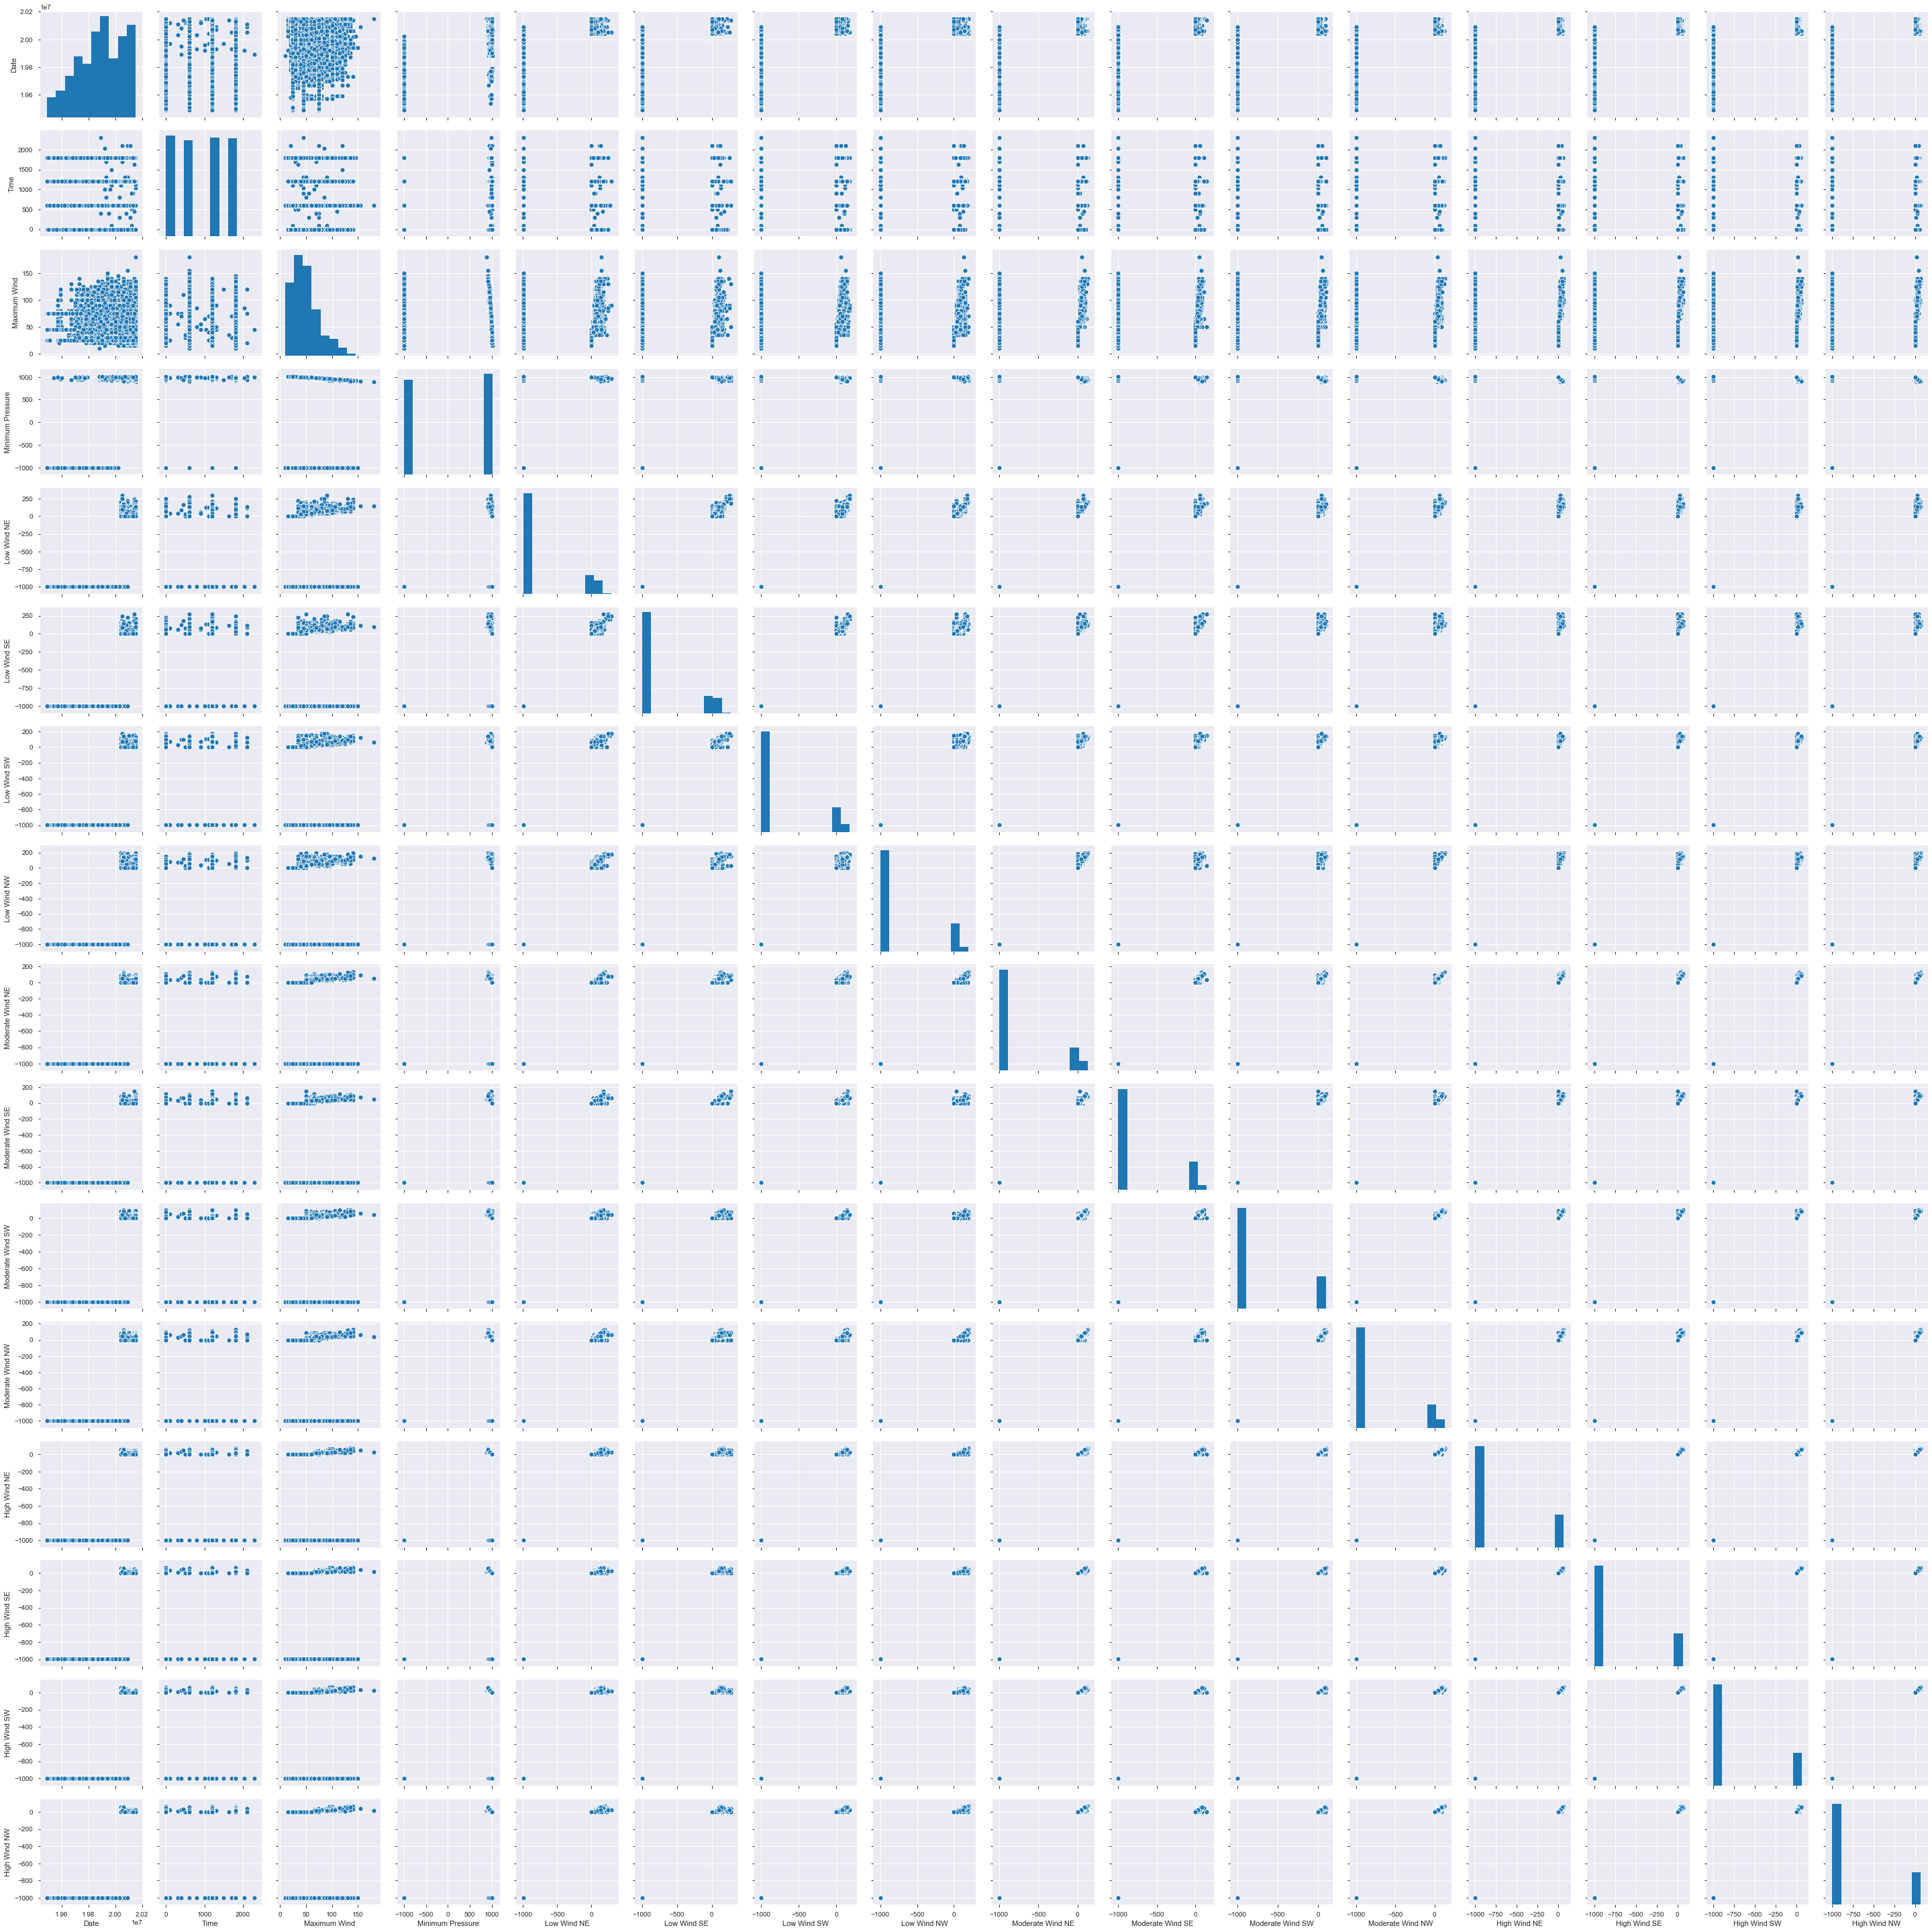

In [11]:
sns.pairplot(data)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,shuffle=True)

# Decision Tress Classifier

In [13]:
model=DecisionTreeClassifier(criterion="entropy",min_samples_split=5)
model=model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)
metrics.accuracy_score(y_test_pred,y_test)


0.9435766656040804

In [14]:
model=DecisionTreeClassifier(criterion="gini",min_samples_split=5)
model=model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)
metrics.accuracy_score(y_test_pred,y_test)


0.9442142174051642

# Random Forest

In [15]:
model=RandomForestClassifier(n_estimators=1000)
model=model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)
metrics.accuracy_score(y_test_pred,y_test)


0.9477207523111253

# SVM

In [16]:
model=SVC(kernel="linear")
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
metrics.accuracy_score(y_test,model.predict(x_test))

0.9470832005100415

In [ ]:
model=SVC(kernel="poly")
model.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
metrics.accuracy_score(y_test,model.predict(x_test))

# Naive Bayes 

In [ ]:
model=GaussianNB()
model=model.fit(x_train,y_train)

In [ ]:
y_test_pred=model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,model.predict(x_test))